In [1]:

! pip install kneed


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
%matplotlib inline

# Read Data

In [2]:

url="https://raw.githubusercontent.com/jarif87/DataSets/main/mall_customer.csv"
df=pd.read_csv(url)

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop('CustomerID', axis=1,inplace=True)
df.rename(columns={'Age':'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)': 'score'}, inplace=True)

In [5]:
df.head()

,Gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
 1   age     200 non-null    int64 
 2   income  200 non-null    int64 
 3   score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [7]:
df.describe()

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
df.shape

(200, 4)

In [9]:
df.isnull().sum()

Gender    0
age       0
income    0
score     0
dtype: int64

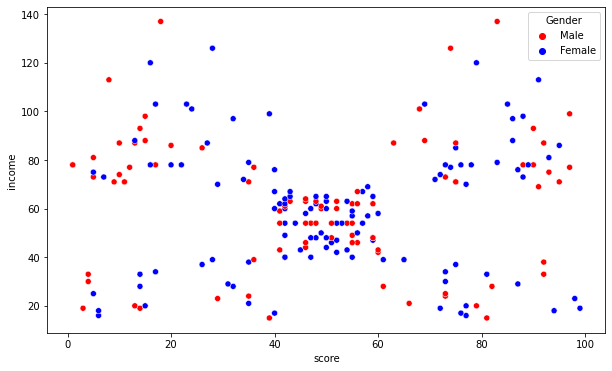

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="score", y="income",color="red",hue="Gender",palette=["red","blue"])
plt.show()

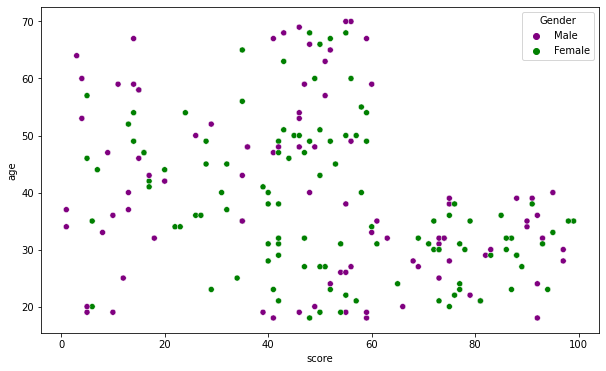

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="score", y="age",color="green",hue="Gender",palette=["purple","green"])
plt.show()

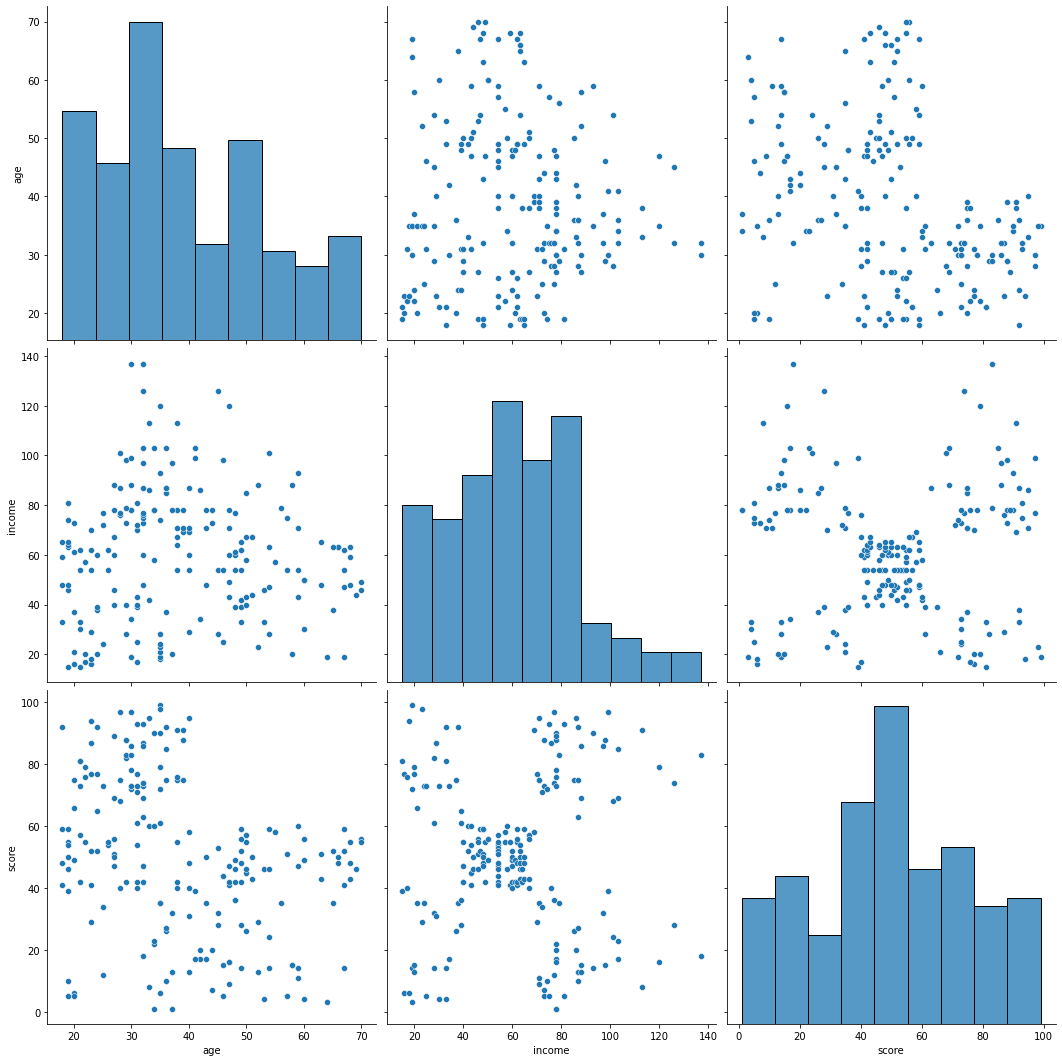

In [12]:
sns.pairplot(df,height=5)
plt.show()

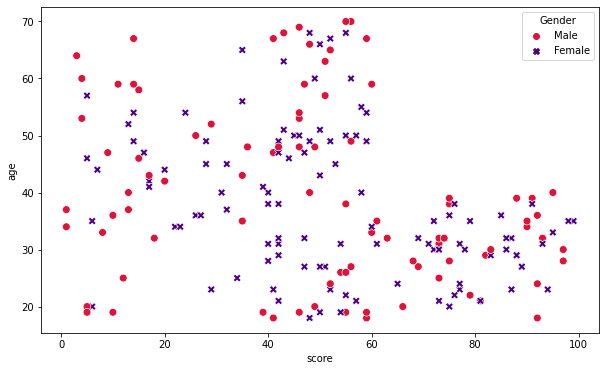

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="score", y="age",color="green",hue="Gender",palette=["crimson","indigo"],style="Gender",s=60)
plt.show()

# Before Elbow Method

In [14]:
X=df[["score","age"]]

# Kmeans Cluster

In [15]:
k_mean=KMeans()

In [16]:
predict= k_mean.fit(X)
predict=k_mean.predict(X)
print(predict)

[7 1 3 1 7 1 3 2 5 1 5 2 5 1 3 1 6 1 6 2 6 1 5 1 5 2 6 1 6 2 5 1 5 2 5 1 6
 1 6 1 4 2 0 1 6 1 0 7 7 7 0 1 7 4 0 0 0 4 7 0 4 7 4 4 4 7 0 4 7 7 4 0 4 4
 4 7 0 0 7 0 4 0 4 0 7 0 4 7 1 0 4 7 0 0 7 7 0 7 0 7 7 0 4 7 0 7 4 0 4 4 4
 7 0 7 7 7 4 0 0 0 7 0 0 2 6 1 6 2 5 1 5 1 7 1 3 2 5 1 3 1 5 2 7 2 3 2 0 1
 6 2 6 2 6 1 5 2 3 1 3 1 0 2 3 2 6 1 6 2 6 1 3 1 3 2 5 2 5 1 5 2 6 2 5 2 0
 2 5 1 6 2 6 1 3 2 5 1 6 1 3 2]


In [17]:
df["Predicted_value"]=predict
df.head()

,Gender,age,income,score,Predicted_value
0,Male,19,15,39,7
1,Male,21,15,81,1
2,Female,20,16,6,3
3,Female,23,16,77,1
4,Female,31,17,40,7


In [18]:
centriod = k_mean.cluster_centers_
centriod

array([[46.5       , 46.875     ],
       [72.19444444, 29.25      ],
       [90.39285714, 31.28571429],
       [ 8.30769231, 29.76923077],
       [50.63636364, 63.90909091],
       [11.47368421, 53.73684211],
       [26.45      , 40.3       ],
       [48.43333333, 24.03333333]])

In [19]:
df0 = df[df.Predicted_value == 0]
df1 = df[df.Predicted_value == 1]
df2 = df[df.Predicted_value == 2]
df3 = df[df.Predicted_value == 3]
df4 = df[df.Predicted_value == 4]
df5 = df[df.Predicted_value == 5]
df6 = df[df.Predicted_value == 6]
df7 = df[df.Predicted_value == 7]

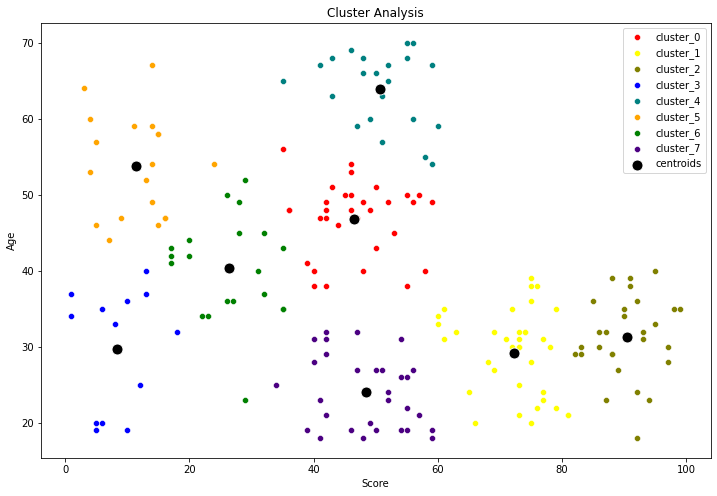

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df0, x='score', y='age', color='red', label='cluster_0')
sns.scatterplot(data=df1, x='score', y='age', color='yellow', label='cluster_1')
sns.scatterplot(data=df2, x='score', y='age', color='olive', label='cluster_2')
sns.scatterplot(data=df3, x='score', y='age', color='blue', label='cluster_3')
sns.scatterplot(data=df4, x='score', y='age', color='teal', label='cluster_4')
sns.scatterplot(data=df5, x='score', y='age', color='orange', label='cluster_5')
sns.scatterplot(data=df6, x='score', y='age', color='green', label='cluster_6')
sns.scatterplot(data=df7, x='score', y='age', color='indigo', label='cluster_7')
sns.scatterplot(x=centriod[:, 0], y=centriod[:, 1], color='black', label='centroids',s=120)
plt.legend()
plt.xlabel('Score')
plt.ylabel('Age')
plt.title('Cluster Analysis')
plt.show()


# Elbow Method

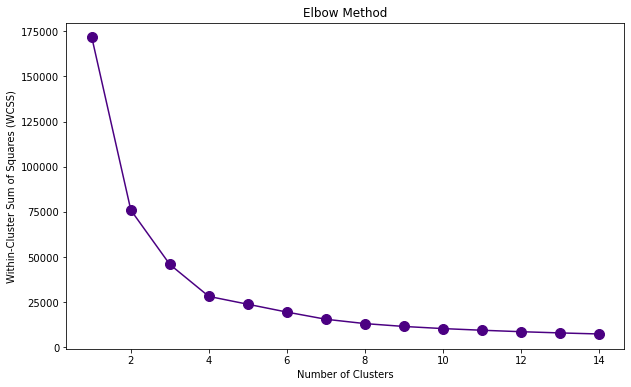

In [21]:
k_values = range(1,15)
wcss = [] 
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(k_values, wcss, marker='o',color="indigo",markersize=10)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()


In [22]:
wcss

[171535.5,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23826.711373957944,
 19489.643884468675,
 15514.193134351035,
 13118.071195144727,
 11533.729822029822,
 10353.789370109507,
 9433.699661875648,
 8631.73418785377,
 7956.049698455427,
 7371.876279496648]

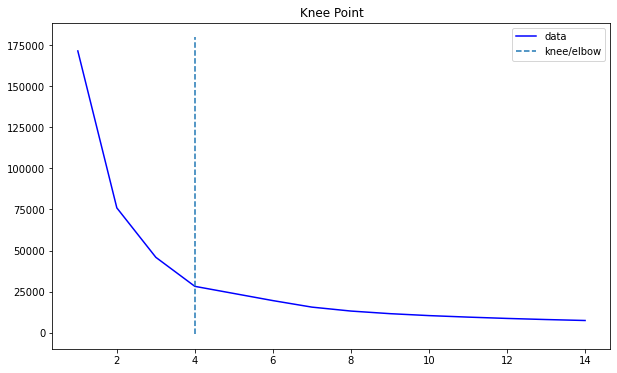

In [23]:

kn = KneeLocator(list(k_values), list(wcss), curve='convex', direction='decreasing')

kn.plot_knee(figsize=(10,6))



In [24]:
kn.knee

4

# After Elbow Method

In [25]:
k_mean0=KMeans(n_clusters=4)
predict= k_mean0.fit(X)
predict=k_mean0.predict(X)
df["New_Predict"]=predict
print(predict)

[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 3
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [26]:
df.head()

,Gender,age,income,score,Predicted_value,New_Predict
0,Male,19,15,39,7,3
1,Male,21,15,81,1,1
2,Female,20,16,6,3,0
3,Female,23,16,77,1,1
4,Female,31,17,40,7,3


In [27]:
centriod0 = k_mean0.cluster_centers_
centriod0

array([[15.02083333, 43.29166667],
       [82.35087719, 30.1754386 ],
       [48.22916667, 55.70833333],
       [49.14893617, 27.61702128]])

In [28]:
df0 = df[df.New_Predict == 0]
df1 = df[df.New_Predict == 1]
df2 = df[df.New_Predict==2]
df3 = df[df.New_Predict==3]


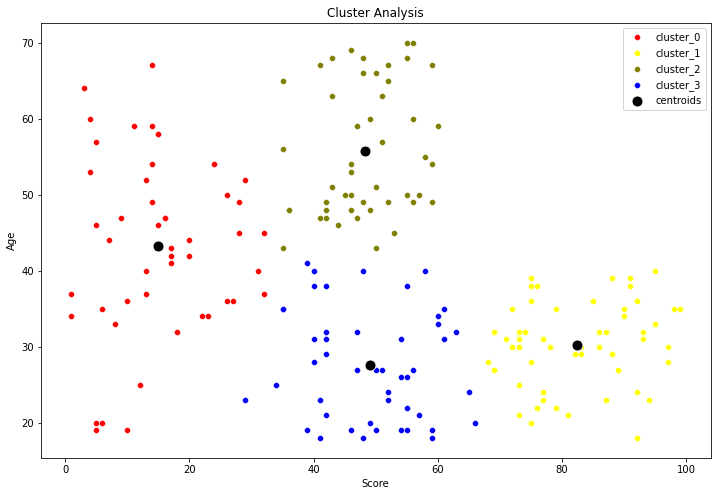

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df0, x='score', y='age', color='red', label='cluster_0')
sns.scatterplot(data=df1, x='score', y='age', color='yellow', label='cluster_1')
sns.scatterplot(data=df2, x='score', y='age', color='olive', label='cluster_2')
sns.scatterplot(data=df3, x='score', y='age', color='blue', label='cluster_3')
sns.scatterplot(x=centriod0[:, 0], y=centriod0[:, 1], color='black', label='centroids',s=120)
plt.legend()
plt.xlabel('Score')
plt.ylabel('Age')
plt.title('Cluster Analysis')
plt.show()